<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Dela_Farahita_Zain_Modul_6_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.  Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

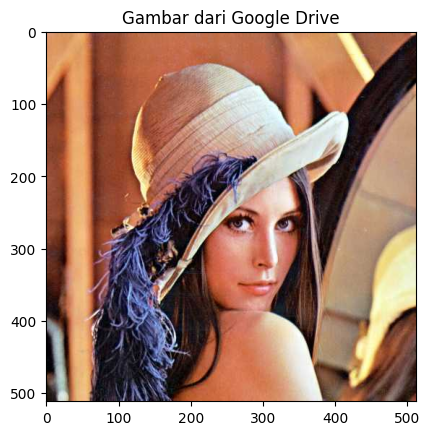

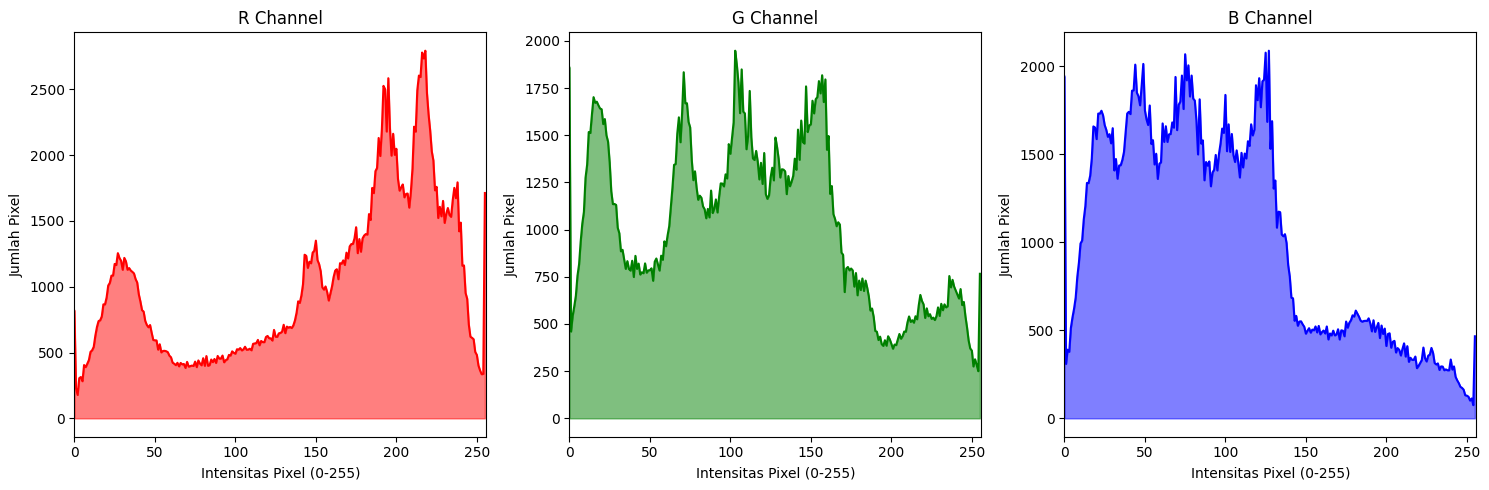

In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Path ke gambar di Google Drive
image_path = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul6/lena.jpg'

# Membaca gambar
image = cv2.imread(image_path)

# Convert BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot Gambar
plt.imshow(image_rgb)
plt.title('Gambar dari Google Drive')
plt.show()

# Membuat Histogram RGB secara terpisah
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))

# Plot histogram untuk setiap warna
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)  # 1 baris, 3 kolom
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.fill_between(range(256), hist.flatten(), color=color, alpha=0.5)  # Mengisi area di bawah histogram
    plt.title(f'{color.upper()} Channel')
    plt.xlabel('Intensitas Pixel (0-255)')
    plt.ylabel('Jumlah Pixel')
    plt.xlim([0, 256])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Mengatur layout agar title tidak tertutup

plt.tight_layout()
plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

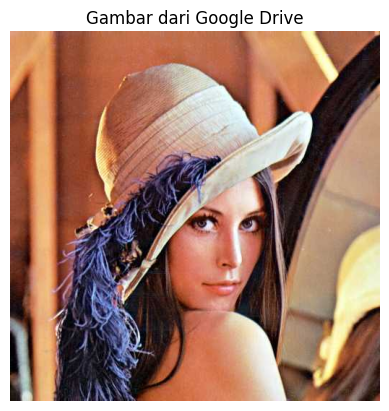

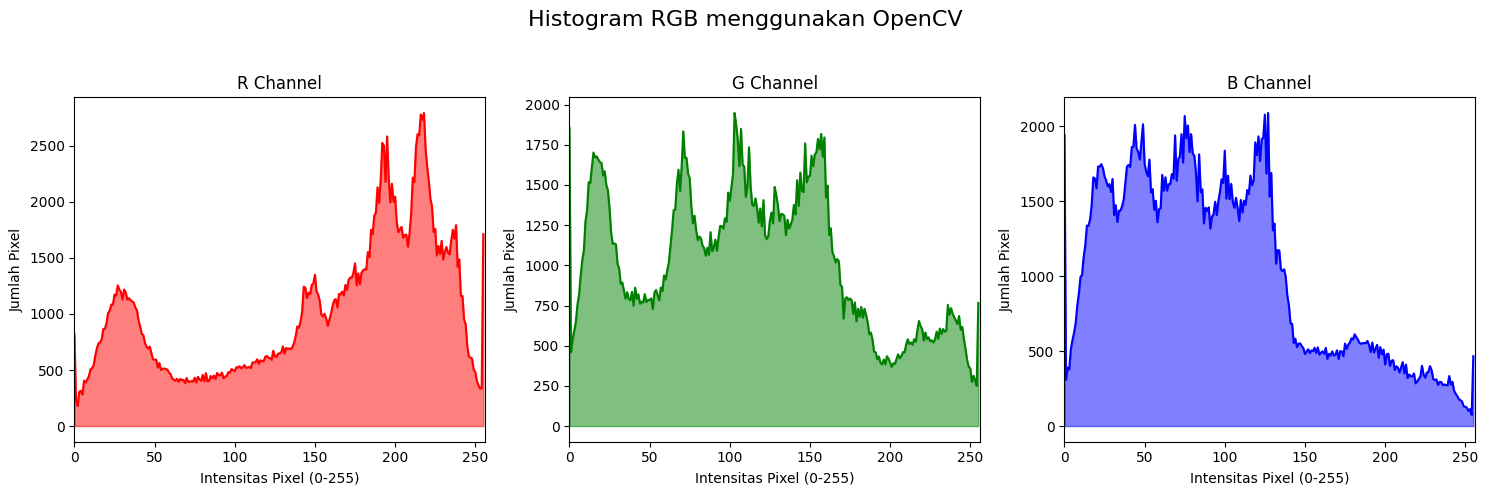

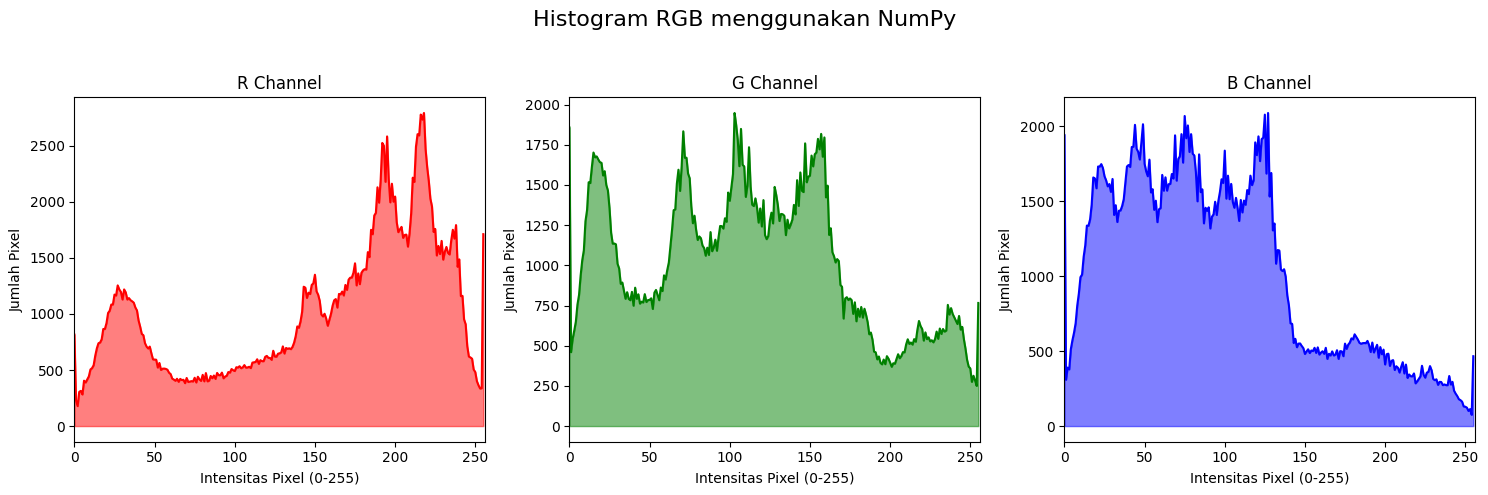

In [ ]:
# Membaca gambar
image = cv2.imread(image_path)

# Convert BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot Gambar untuk memastikan berhasil di-load
plt.imshow(image_rgb)
plt.title('Gambar dari Google Drive')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

# Membuat Histogram RGB menggunakan OpenCV
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB menggunakan OpenCV', fontsize=16)

for i, color in enumerate(colors):
    hist_cv = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.subplot(1, 3, i + 1)
    plt.plot(hist_cv, color=color)
    plt.fill_between(range(256), hist_cv.flatten(), color=color, alpha=0.5)
    plt.title(f'{color.upper()} Channel')
    plt.xlabel('Intensitas Pixel (0-255)')
    plt.ylabel('Jumlah Pixel')
    plt.xlim([0, 256])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Membuat Histogram RGB menggunakan NumPy
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB menggunakan NumPy', fontsize=16)

for i, color in enumerate(colors):
    hist_np, _ = np.histogram(image_rgb[..., i], bins=256, range=(0, 256))
    plt.subplot(1, 3, i + 1)
    plt.plot(hist_np, color=color)
    plt.fill_between(range(256), hist_np, color=color, alpha=0.5)
    plt.title(f'{color.upper()} Channel')
    plt.xlabel('Intensitas Pixel (0-255)')
    plt.ylabel('Jumlah Pixel')
    plt.xlim([0, 256])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

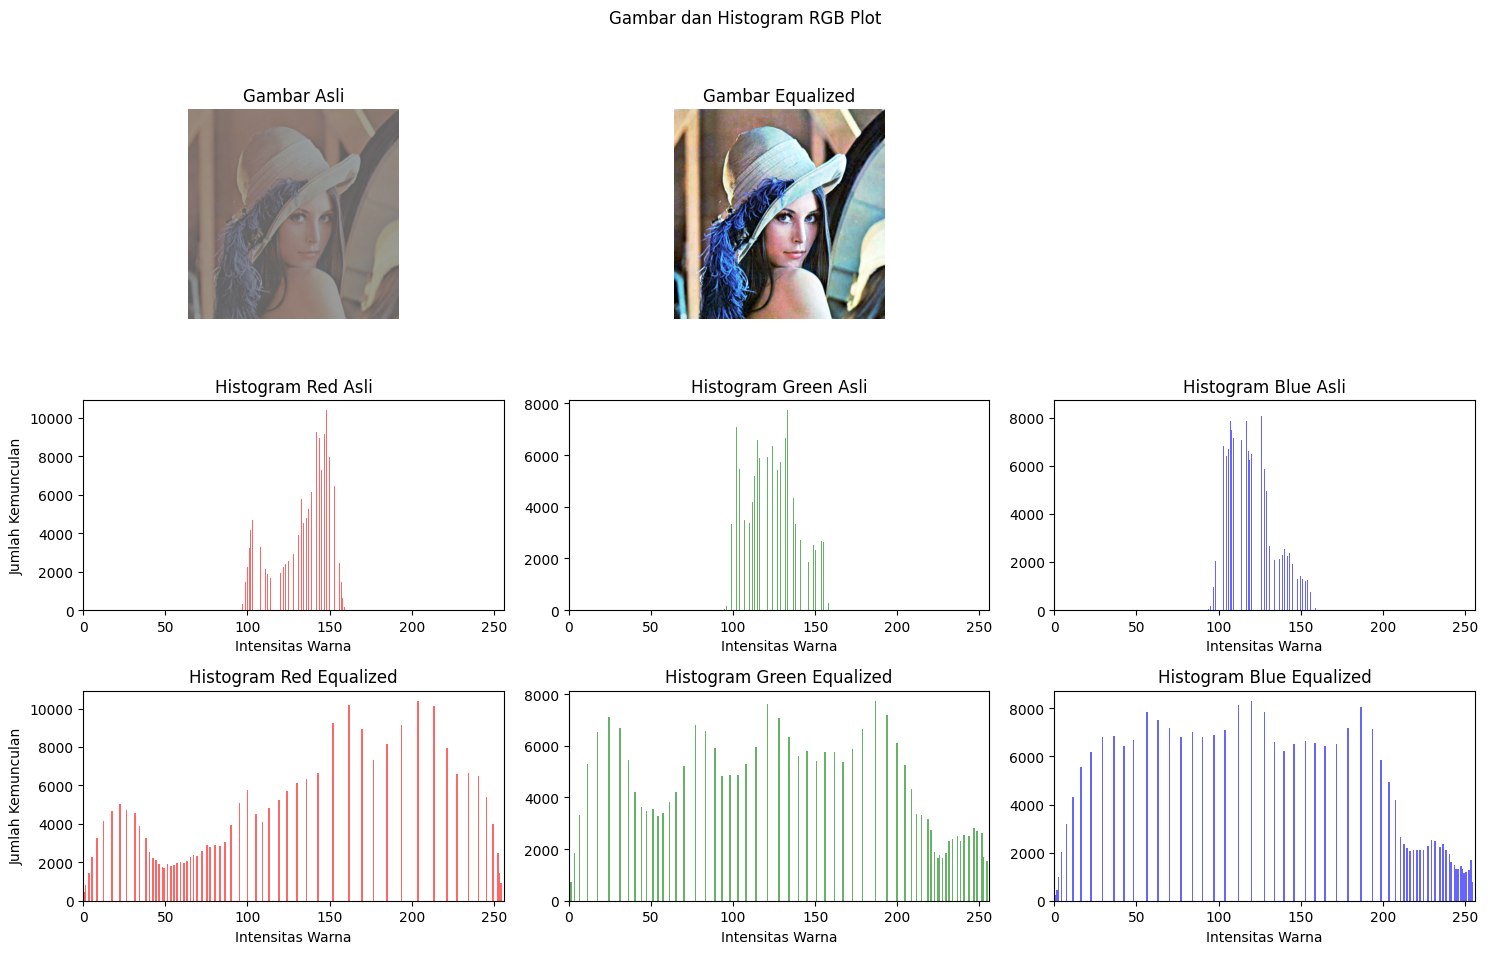

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar dari file yang sudah diunggah
image_path = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul6/lena_lc.jpg'
image = cv2.imread(image_path)

# 2. Convert BGR ke RGB (OpenCV menggunakan BGR secara default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 3. Memisahkan gambar menjadi channel R, G, B
r, g, b = cv2.split(image_rgb)

# 4. Melakukan Histogram Equalization pada setiap channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Menggabungkan kembali channel yang sudah di-equalize
image_eq = cv2.merge((r_eq, g_eq, b_eq))

# 5. Fungsi untuk menampilkan histogram terpisah
def plot_histograms(image_r, image_g, image_b, title_r, title_g, title_b, position_offset=0):
    # Histogram Red channel
    plt.subplot(3, 3, 4 + position_offset)
    plt.hist(image_r.ravel(), bins=256, color='red', alpha=0.6)
    plt.title(title_r)
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])

    # Histogram Green channel
    plt.subplot(3, 3, 5 + position_offset)
    plt.hist(image_g.ravel(), bins=256, color='green', alpha=0.6)
    plt.title(title_g)
    plt.xlabel('Intensitas Warna')
    plt.xlim([0, 256])

    # Histogram Blue channel
    plt.subplot(3, 3, 6 + position_offset)
    plt.hist(image_b.ravel(), bins=256, color='blue', alpha=0.6)
    plt.title(title_b)
    plt.xlabel('Intensitas Warna')
    plt.xlim([0, 256])

# 6. Menampilkan gambar asli dan hasil equalization
plt.figure(figsize=(15, 10))

# Menampilkan gambar asli
plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis('off')

# Menampilkan gambar setelah histogram equalization
plt.subplot(3, 3, 2)
plt.imshow(image_eq)
plt.title("Gambar Equalized")
plt.axis('off')

# Menampilkan histogram untuk gambar asli
plot_histograms(r, g, b, 'Histogram Red Asli', 'Histogram Green Asli', 'Histogram Blue Asli')

# Menampilkan histogram untuk gambar setelah histogram equalization
plot_histograms(r_eq, g_eq, b_eq, 'Histogram Red Equalized', 'Histogram Green Equalized', 'Histogram Blue Equalized', position_offset=3)

# Menampilkan judul keseluruhan
plt.suptitle('Gambar dan Histogram RGB Plot')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

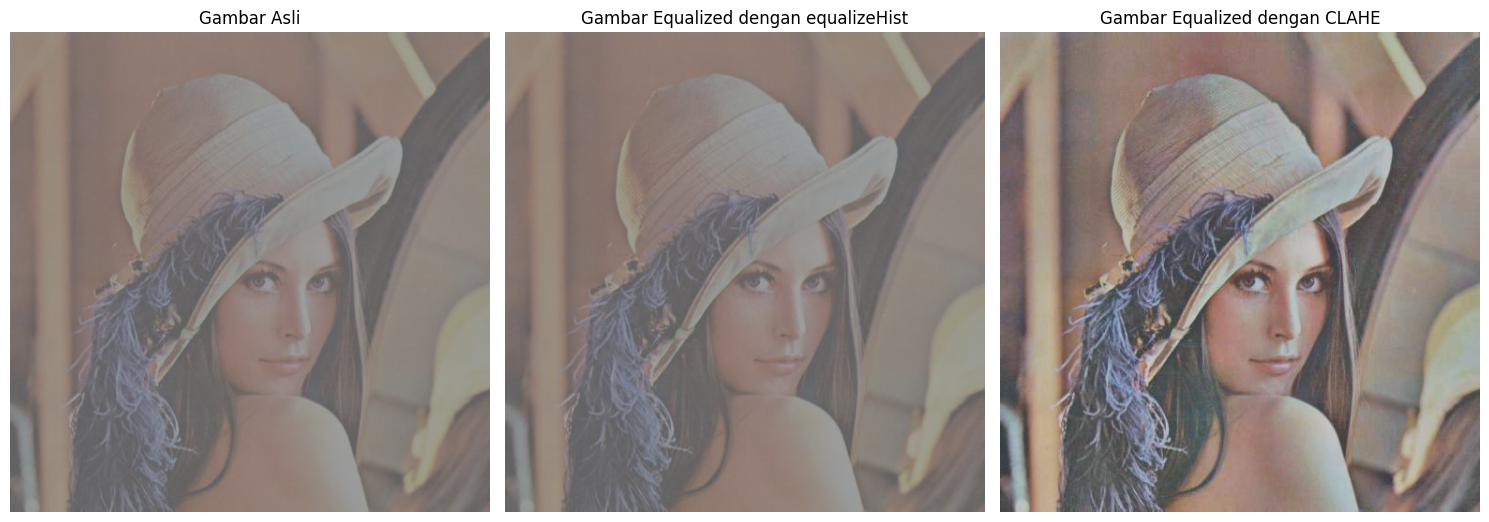

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dari file
image_path = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul6/lena_lc.jpg'
image = cv2.imread(image_path)

# Convert BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Memisahkan gambar menjadi channel R, G, B
r, g, b = cv2.split(image_rgb)

# Membuat objek CLAHE dengan grid size 8x8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Melakukan CLAHE (Adaptive Histogram Equalization) pada setiap channel
r_clahe = clahe.apply(r)
g_clahe = clahe.apply(g)
b_clahe = clahe.apply(b)

# Menggabungkan kembali channel yang sudah di-CLAHE
image_clahe = cv2.merge((r_clahe, g_clahe, b_clahe))

# Menampilkan gambar asli, hasil EqualizeHist, dan hasil CLAHE
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis('off')

# Gambar hasil equalizeHist
plt.subplot(1, 3, 2)
plt.imshow(cv2.merge((r, g, b)))
plt.title("Gambar Equalized dengan equalizeHist")
plt.axis('off')

# Gambar hasil CLAHE
plt.subplot(1, 3, 3)
plt.imshow(image_clahe)
plt.title("Gambar Equalized dengan CLAHE")
plt.axis('off')

plt.tight_layout()
plt.show()


cv2.equalizeHist() meningkatkan kontras tiap saluran warna (RGB), tapi kadang hasilnya terlihat kurang alami. CLAHE memberikan hasil yang lebih natural dan menjaga detail, terutama di area yang terlalu terang atau gelap.
Perbandingan keduanya menunjukkan bahwa CLAHE lebih baik dalam menjaga keseimbangan dan detail gambar.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih, merah seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

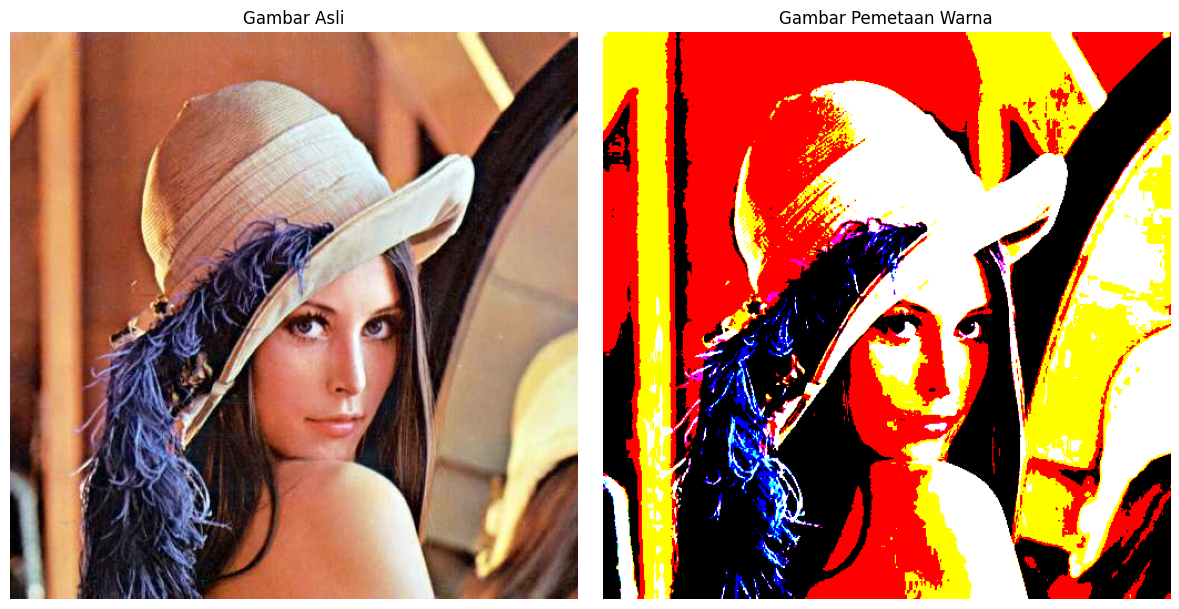

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar
image_path = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul6/lena.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2. Definisikan warna dasar
colors = {
    'black': [0, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255],
    'red': [255, 0, 0],
}

# 3. Pemetaan warna
def map_color(pixel):
    min_distance = float('inf')
    closest_color = [0, 0, 0]

    for color_name, color_value in colors.items():
        # Hitung jarak Euclidean antara pixel dan warna
        distance = np.linalg.norm(np.array(pixel) - np.array(color_value))
        if distance < min_distance:
            min_distance = distance
            closest_color = color_value

    return closest_color

# Menerapkan pemetaan warna ke seluruh gambar
mapped_image = np.zeros_like(image_rgb)
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        mapped_image[i, j] = map_color(image_rgb[i, j])

# 4. Menampilkan hasil
plt.figure(figsize=(12, 6))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Gambar Asli")
plt.axis('off')

# Menampilkan gambar yang telah dipetakan
plt.subplot(1, 2, 2)
plt.imshow(mapped_image)
plt.title("Gambar Pemetaan Warna")
plt.axis('off')

plt.tight_layout()
plt.show()


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

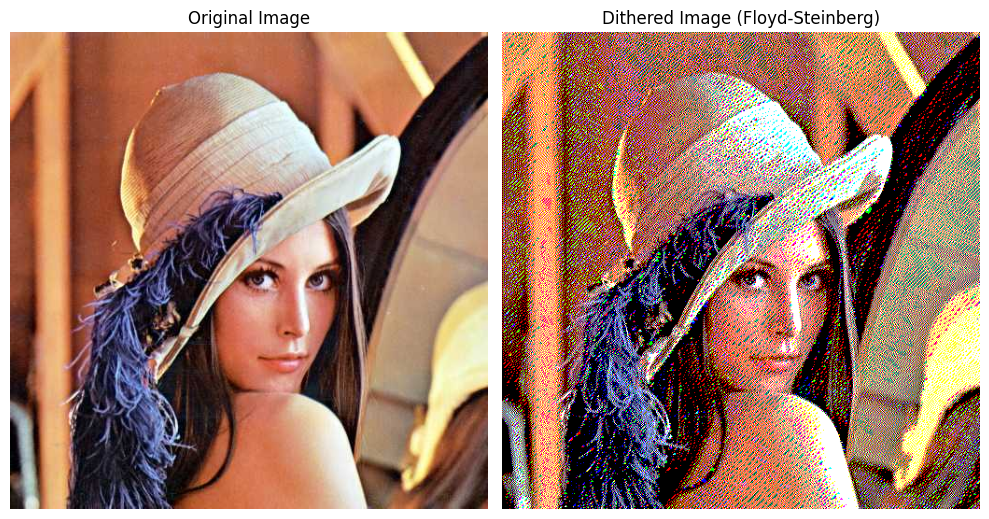

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar
image_path = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul6/lena.jpg'
image = cv2.imread(image_path)

# 2. Implementasi Dithering Floyd-Steinberg untuk gambar berwarna
def floyd_steinberg_dithering_color(image):
    height, width, channels = image.shape
    dithered_image = np.zeros_like(image)

    for c in range(channels):  # Iterasi untuk setiap saluran warna
        for i in range(height):
            for j in range(width):
                old_pixel = image[i, j, c]
                new_pixel = 255 * (old_pixel > 128)  # Thresholding ke 0 atau 255
                dithered_image[i, j, c] = new_pixel
                quant_error = old_pixel - new_pixel

                # Sebarkan kesalahan kuantisasi
                if j + 1 < width:  # Pixel kanan
                    image[i, j + 1, c] += quant_error * 7 / 16
                if i + 1 < height:  # Pixel bawah
                    image[i + 1, j, c] += quant_error * 5 / 16
                    if j + 1 < width:  # Pixel kanan bawah
                        image[i + 1, j + 1, c] += quant_error * 1 / 16
                if i - 1 >= 0:  # Pixel atas
                    if j + 1 < width:  # Pixel kanan atas
                        image[i - 1, j + 1, c] += quant_error * 3 / 16

    return dithered_image

# Terapkan dithering
dithered_result = floyd_steinberg_dithering_color(image.copy())

# 4. Menampilkan hasil
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Dithered Image (Floyd-Steinberg)')
plt.imshow(cv2.cvtColor(dithered_result, cv2.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
plt.axis('off')

plt.tight_layout()
plt.show()


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

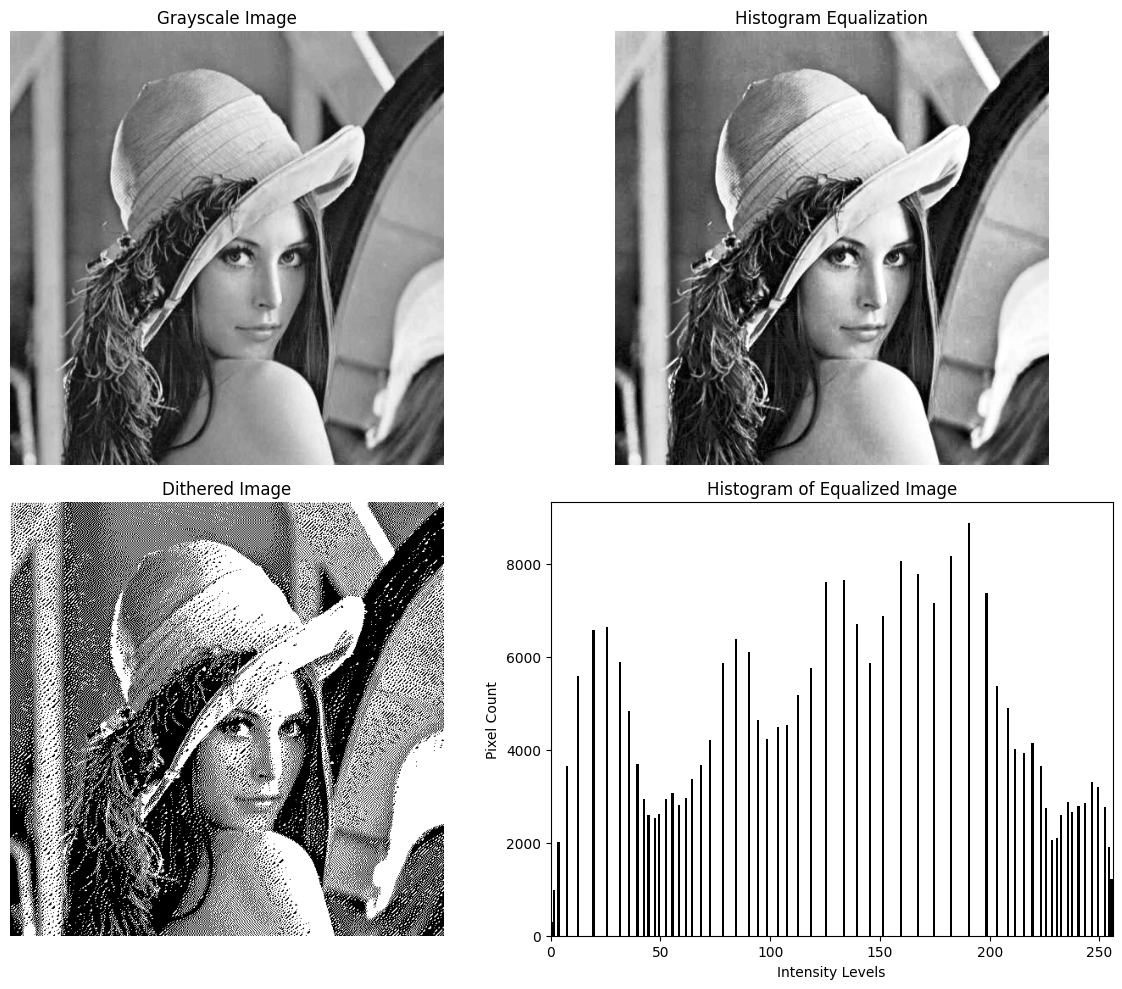

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar
image_path = '/content/drive/MyDrive/PCVK_Ganjil_2024/Modul6/lena_lc.jpg'
image = cv2.imread(image_path)

# 2. Konversi ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# 4. Implementasi Dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    height, width = image.shape
    dithered_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            old_pixel = image[i, j]
            new_pixel = 255 * (old_pixel > 128)  # Thresholding ke 0 atau 255
            dithered_image[i, j] = new_pixel
            quant_error = old_pixel - new_pixel

            # Sebarkan kesalahan kuantisasi
            if j + 1 < width:  # Pixel kanan
                image[i, j + 1] += quant_error * 7 / 16
            if i + 1 < height:  # Pixel bawah
                image[i + 1, j] += quant_error * 5 / 16
                if j + 1 < width:  # Pixel kanan bawah
                    image[i + 1, j + 1] += quant_error * 1 / 16
            if i - 1 >= 0:  # Pixel atas
                if j + 1 < width:  # Pixel kanan atas
                    image[i - 1, j + 1] += quant_error * 3 / 16

    return dithered_image

# Terapkan dithering
dithered_result = floyd_steinberg_dithering(equalized_image.copy())

# 5. Menampilkan hasil
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histogram Equalization')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Dithered Image')
plt.imshow(dithered_result, cmap='gray')
plt.axis('off')

# 6. Menampilkan Histogram
plt.subplot(2, 2, 4)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel('Intensity Levels')
plt.ylabel('Pixel Count')

plt.tight_layout()
plt.show()
